In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

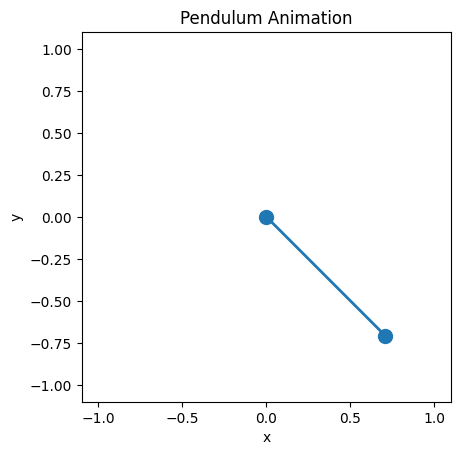

In [6]:
def sode(y, t):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]
    
# Initial Parameters
g = 9.81
L = 1.0
theta0 = np.pi / 4
omega0 = 0

# Time interval
t_total = 10
t_interval = np.linspace(0, 10, 300)

# Solve ODE
sol = odeint(sode, [theta0, omega0], t_interval)
theta = sol[:, 0]


# Convert to cartesian coordinates
x = L * np.sin(theta)
y = -L * np.cos(theta)

# Setting up plot figure
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-L-0.1, L+0.1)
ax.set_ylim(-L-0.1, L+0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Pendulum Animation")

# Rod and bob
line, = ax.plot([], [], 'o-', lw=2, markersize=10)  

# --- Animation function ---
def update(i):
    line.set_data([0, x[i]], [0, y[i]])  # pivot to bob
    return line,

# --- Animate ---
ani = FuncAnimation(fig, update, frames=len(t_interval), interval=1000 * (t_interval[1] - t_interval[0]), blit=False)

HTML(ani.to_html5_video())